In [1]:
# TODO - this needs to be imported from the od module

import array
import numpy as np


class LorenzSystem:
    """

    Parameters
    ----------
    x : float
        The current x-coordinate. Default starting value is 0.0.
    y : float
        The current y-coordinate. Default starting value is 1.0.
    z : float
        The current z-coordinate. Default starting value is 1.05.
    sigma : float
        Default value is 10.
    rho : float
        Default value is 28.
    beta : float
        Default value is 8/3.

    Attributes
    ----------
    x, y, z -> float
        The current coordinates.

    Methods
    -------
    take_step -> None
        Take a single step along the trajectory.
    """

    def __init__(self,
                 x=0.9,
                 y=0,
                 z=0,
                 sigma=10,
                 rho=28,
                 beta=8 / 3):

        self._x_init = x
        self._y_init = y
        self._z_init = z

        self._x = None
        self._y = None
        self._z = None
        self.reset()

        self._sigma = sigma
        self._rho = rho
        self._beta = beta

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    @property
    def z(self):
        return self._z

    def coordinates(self):
        return array.array('f', [self._x, self._y, self._z])

    @property
    def sigma(self):
        return self._sigma

    @sigma.setter
    def sigma(self, sigma):
        self._sigma = sigma

    @property
    def rho(self):
        return self._rho

    @rho.setter
    def rho(self, rho):
        self._rho = rho

    @property
    def beta(self):
        return self._beta

    @beta.setter
    def beta(self, beta):
        self._beta = beta

    def __compute_derivatives(self, x, y, z):
        dx_dt = self._sigma * (y - x)
        dy_dt = x * (self._rho - z) - y
        dz_dt = (x * y) - (self._beta * z)

        values = array.array('d', [dx_dt, dy_dt, dz_dt])

        return values

    def take_step(self, step_size: float = 0.01) -> None:
        """Determine the value of f(t_n+1, x, y, z) at the next timestep.

        This stepper uses the most basic possible scheme to integrate
        the ODEs of the system; Euler's method. This only requires a
        single evaluation of f(t, x, y, z) so is cheap, but is only accurate
        on the order of the square of the timestep.

        Parameters
        ----------
        step_size
            The size of the step (in time units) to take.
            Default of 0.01 was determined by experimentation only.
        """
        partial_derivatives = self.__compute_derivatives(self._x,
                                                         self._y,
                                                         self._z)

        self._x = self._x + (partial_derivatives[0] * step_size)
        self._y = self._y + (partial_derivatives[1] * step_size)
        self._z = self._z + (partial_derivatives[2] * step_size)

    def reset(self):
        """Return the system to its starting values."""
        self._x = self._x_init
        self._y = self._y_init
        self._z = self._z_init


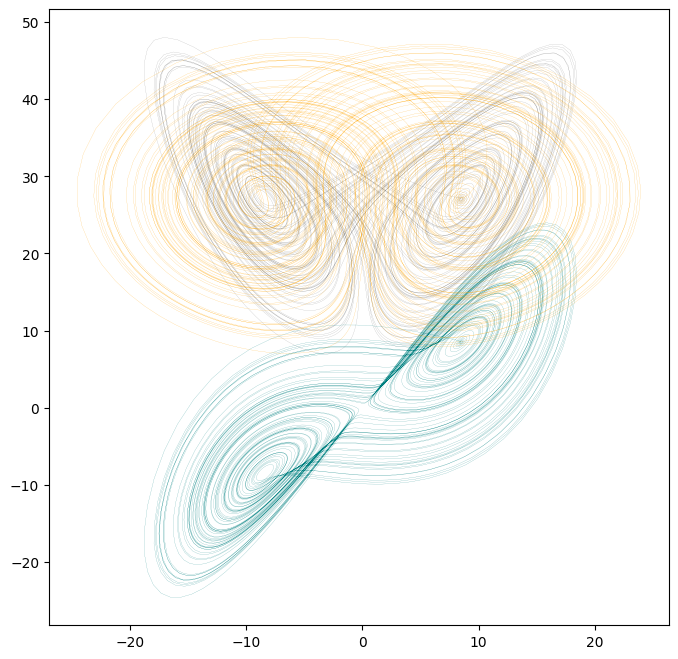

In [17]:
import matplotlib
import matplotlib.pyplot as plt


N = 1000000
n_plot = int(N*0.99)

lorenz_system = LorenzSystem(rho=28, sigma=10, beta=8/3)

xyz_values = np.empty(shape=(N, 3))
xyz_values[0, :] = lorenz_system.coordinates()

for i in range(1, N):
    lorenz_system.take_step(step_size=0.01)
    xyz_values[i, :] = lorenz_system.coordinates()

f = plt.plot(xyz_values[n_plot:, 0], xyz_values[n_plot:, 2], lw=0.1, c="gray")
f = plt.plot(xyz_values[n_plot:, 0], xyz_values[n_plot:, 1], lw=0.1, c="teal")
f = plt.plot(xyz_values[n_plot:, 1], xyz_values[n_plot:, 2], lw=0.1, c="orange")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

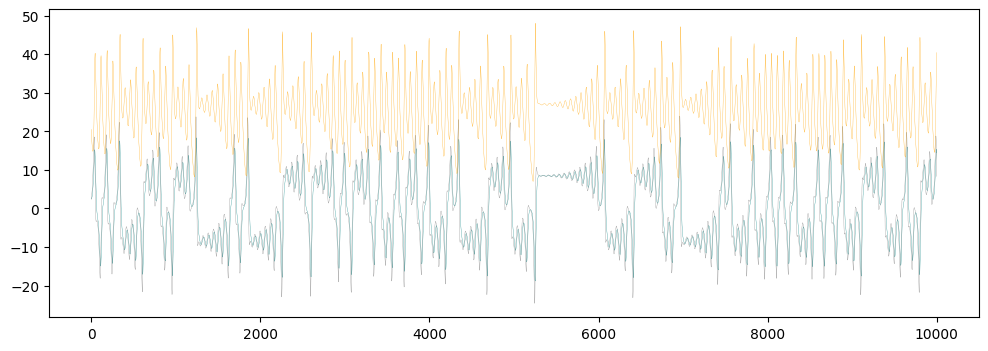

In [18]:
f = plt.plot(xyz_values[n_plot:, 0], lw=0.2, c="teal")
f = plt.plot(xyz_values[n_plot:, 1], lw=0.2, c="gray")
f = plt.plot(xyz_values[n_plot:, 2], lw=0.2, c="orange")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 4)

#### Outputs

The algorithm produces 

2 Audio/CV Outs
2 CV Outs
2 Pulse Outs

The x and y outputs are quite similar and cross zero unpredictably. The zero-crossings could be used to produce pulses.
Combinations of the outputs may also be useful, or multiple systems running at once with different initial points (OCHD inspired?, split to two like the advent example)
If yu can get it fast enough, could be an audio oscillator?

#### Inputs
Seems obvious to want to control the rate, including down to very slow speeds.
speed could be CV in plus a knob
could also control the magnitude of the CV outputs (scaled to voltage, that is).
Could also be control over the model "constants" if that's useful? how do plots compare for these params?

Pulse inputs could be used to reset with the same initial values so that you can get repeating patterns.

* CV out - the first coordinate of the system
* CV out - the second or third coordinate of the system
* Pulse out - fires when y or z crosses zero
* Knob - scale the first coordinate of the system
* CV in - change beta of the system
* CV in - change sigma of the system
* Pulse in - reset the simulation
* Switch - choose between values of rho

Main knob - control shared rate, one fast one slower tuned like OCHD. Could also package up as a "single-side" for combination with others.

This seems pretty interesting.

Only thing to watch is that the whole thing can reach a state where all inputs go to a global attractor.
Bear in mind also that if you do find a set of parameters and initial state with a single attractor it could be used as an envelope.

the switch might be better off choosing which pair of outputs you want, since there are 3. Or maybe in the one-big-module version